In [37]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
%matplotlib inline

def Database():
    """compile data sets into a data library, the output will be a DataFrame"""
    data_1 = pd.read_excel('data/Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=3)
    data = data_1[['Name','Family', 'FP Exp.', 'CN Exp.']]
    result_1 = data.drop(index=0)
    result_1.reset_index(drop=True, inplace=True)
    data_2 = pd.read_excel('data/Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=4)
    result_2 = data_2.loc[: , '-H': 'aaCa']
    result = pd.concat([result_1, result_2], axis=1)
    return result

## data clean

In [61]:
def data_clean():
    """split data and generate train & test subset"""
    df = Database()
    train, test = train_test_split(df, test_size=0.1)
    a = train.loc[:,'-H': 'aaCa']
    X_train = a.mask(a>0, 1)
    y_train = train['Family']

    b = test.loc[:,'-H': 'aaCa']
    X_test = b.mask(b>0, 1)
    y_test = test['Family']
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = data_clean()

In [62]:
train.head()

,Name,Family,FP Exp.,CN Exp.,-H,-CH3,-CH2-,>CH-,>C<,=CH2,...,-OH (phenol),-O-,(-O-)R,aOa,>C=O,(>C=O)R,-CHO,-COOH,-COO-,aaCa
524,methyl decanoate,Esters,367.15,47.0,22,2,8,0,0,0,...,0,1,0,0,1,0,0,0,1,0
872,"(3S,4R)-dimethyltetradecane",Paraffins,NaN,NaN,34,4,10,2,0,0,...,0,0,0,0,0,0,0,0,0,0
543,methyl tetradecanoate,Esters,NaN,72.0,30,2,12,0,0,0,...,0,1,0,0,1,0,0,0,1,0
427,"ethyl buta-2,3-dienoate",Esters,320.15,NaN,8,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
466,isobutyl 2-methylpropanoate,Esters,311.15,NaN,16,4,1,2,0,0,...,0,1,0,0,1,0,0,0,1,0


## lda

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [64]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
train_pred = lda.predict(X_train)

C:\Users\sxzxc\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [65]:
# print accuracy 
accu = metrics.accuracy_score(y_test, y_pred)
accu

0.9568965517241379

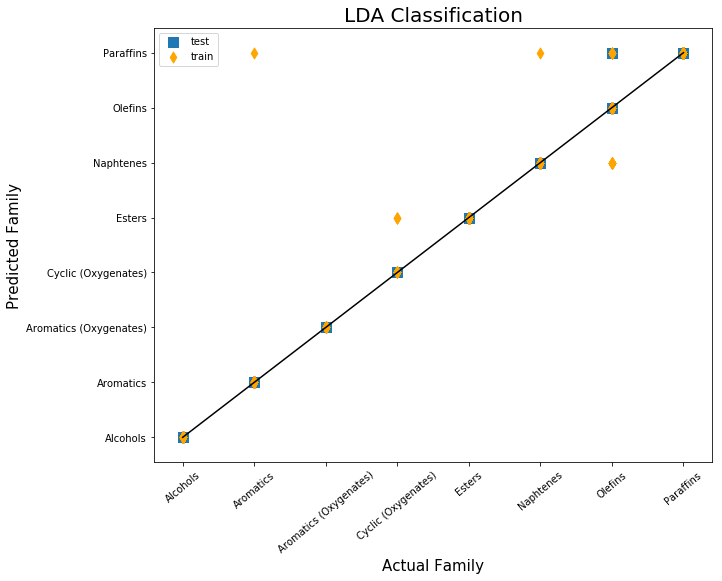

In [75]:
# plot the train and test set
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, marker='s', s=100, label='test')
plt.scatter(y_train, train_pred, marker='d', s=60,c='orange', label='train')
plt.plot([0,7], [0,7], color='k')
plt.xticks(rotation='40')
plt.xlabel('Actual Family', fontsize=15)
plt.ylabel('Predicted Family', fontsize=15)
plt.title('LDA Classification',fontsize=20)
plt.legend()

### define functions

In [67]:
def train_lda(X_train, y_train):
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    return lda

In [76]:
def test_lda(X_train, y_train, X_test, y_test):
    lda = train_lda(X_train, y_train)
    y_pred = lda.predict(X_test)
    train_pred = lda.predict(X_train)    
    print('Accuracy = ', metrics.accuracy_score(y_test, y_pred))
    plt.figure(figsize=(10,8))
    plt.scatter(y_test, y_pred, marker='s', s=100, label='test')
    plt.scatter(y_train, train_pred, marker='d', s=60,c='orange', label='train')
    plt.plot([0,7], [0,7], color='k')
    plt.xticks(rotation='40')
    plt.xlabel('Actual Family', fontsize=15)
    plt.ylabel('Predicted Family', fontsize=15)
    plt.title('LDA Classification',fontsize=20)
    plt.legend()
    return

In [77]:
def predict_family_lda(X_train, y_train, X):
    lda = train_lda(X_train, y_train)
    y_pred = lda.predict(X)
    return y_pred

In [78]:
train_lda(X_train, y_train)

C:\Users\sxzxc\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

C:\Users\sxzxc\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy =  0.956896551724


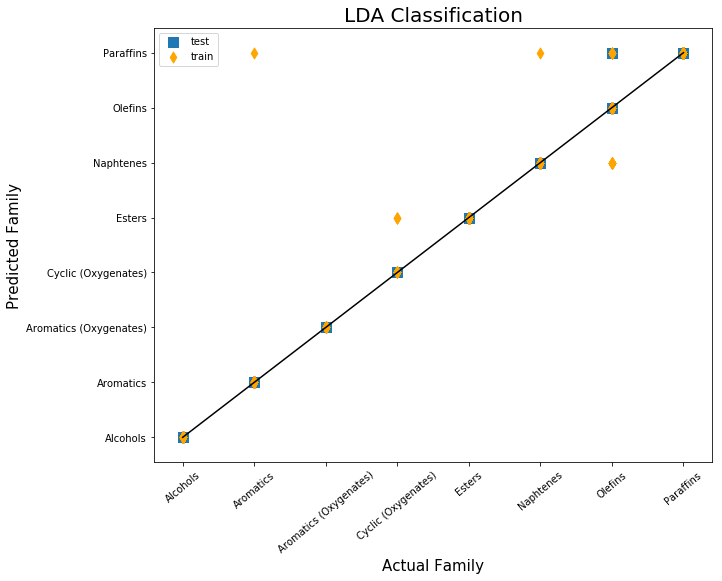

In [79]:
test_lda(X_train, y_train, X_test, y_test)

In [80]:
X=X_train.iloc[0:2,:]
X

,-H,-CH3,-CH2-,>CH-,>C<,=CH2,=CH-,=C<,#CH,#C-,...,-OH (phenol),-O-,(-O-)R,aOa,>C=O,(>C=O)R,-CHO,-COOH,-COO-,aaCa
751,1,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
predict_family_lda(X_train, y_train, X)

C:\Users\sxzxc\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array(['Olefins', 'Aromatics'],
      dtype='<U22')